In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly.express as px

In [4]:
# The data base that im going to use contains information related to a chain of superstores along the US.
# It contains information related to Sales, profits, segments, etc.

In [5]:
import csv

In [6]:
df = pd.read_csv('Sample - Superstore.csv', encoding = 'latin1')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# Im intrested in seeing where is the best market for this chain of superstores.
# Where is the state that has more sales?.

In [9]:
df.set_index('State', inplace=True)

In [10]:
df.sort_values(by='Sales', ascending=True, inplace=True)
top5 = df['Sales'].tail(5)
top5 

State
Delaware      10499.970
New York      11199.968
Washington    13999.960
Indiana       17499.950
Florida       22638.480
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Top 5 States with more Sales')

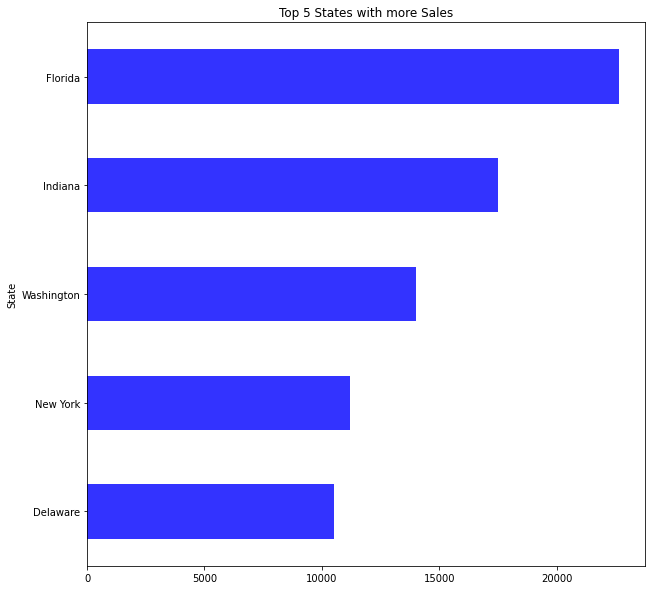

In [11]:
top5.plot(kind='barh', 
           figsize=(10, 10), 
           color='blue',
           alpha=0.8
          )

plt.title('Top 5 States with more Sales')

In [12]:
# Im intrested in seeing where is the best market for this chain of superstores. 
# What state generates more Profit?.

In [13]:
df.sort_values(by='Profit', ascending=True, inplace=True)
top5P = df['Profit'].tail(5)
top5P 

State
Minnesota     4630.4755
Michigan      4946.3700
Delaware      5039.9856
Washington    6719.9808
Indiana       8399.9760
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Top 5 most Profitable States')

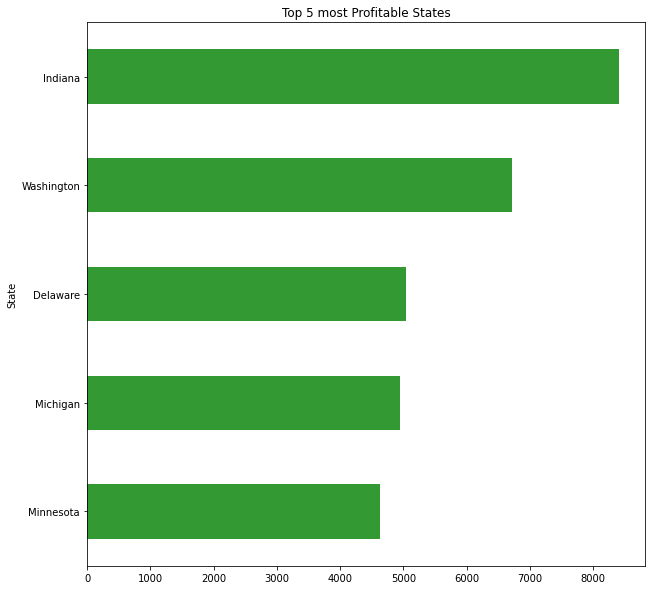

In [14]:
top5P.plot(kind='barh', 
           figsize=(10, 10), 
           color='green',
           alpha=0.8
          )
plt.title('Top 5 most Profitable States')

In [15]:
# Now that we know what state sells more for this chain of superstores. 
# What category generates more for the superstore?.

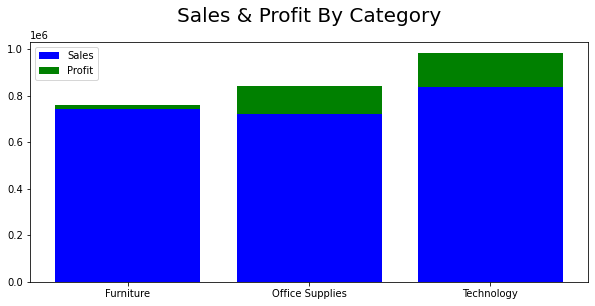

In [16]:
df_stackb = df[['Category','Sales','Profit']]
df_stackb = df_stackb.groupby(['Category']).sum().reset_index()
plt.figure(figsize=[10,15])
plt.subplot(3,1,1)
plt.bar(x=df_stackb['Category'], height=df_stackb['Sales'], color='blue')
plt.bar(x=df_stackb['Category'], height=df_stackb['Profit'], bottom=df_stackb['Sales'], color='green')
plt.title("Sales & Profit By Category", size=20, pad=20)
plt.legend(['Sales','Profit'])

In [17]:
# Problems that i have faced. 
# the data base that i've chosen was creating an error when i wanted to define it as my df, 
# it shwoed the following, 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte in python.
# so i had to type the encoding latin1, ive google it and showed that typing this will help me to delete the error.
# since the latin1 is known for interpreting basically every character.